<h2>Imports and constants</h2>

In [1]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pycountry
%matplotlib inline

In [2]:
data_path = 'data/'

<h2>Functions</h2>

In [3]:
def plot_cities(lons, lats):
    plt.figure(figsize=(8,8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    #ax = plt.axes(projection=ccrs.EuroPP())
    ax.stock_img()
    #ax.coastlines()
    plt.scatter(lons, lats,
             color="blue", marker='o',
             transform=ccrs.Geodetic(),
             )
    plt.show()

In [4]:
#plot_cities(df['Longitude'], df['Latitude'])

<h2>Merging world cities and cost of living index datasets</h2>

In [5]:
# Load world cities
cities = pd.read_csv(data_path + 'worldcitiespop.csv', sep=",")

/home/filip/anaconda2/envs/geo/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Load cost of living index
coli = pd.read_csv(data_path + 'Cost_of_living_index.csv', sep=",")

In [7]:
# Parse original "City" column to "City" and "Country" columns
# TODO the USA countries are in "NY, New York" now.
coli["City"], coli["Country"] = coli["City"].str.lower().str.split(", ", 1).str

In [8]:
# Take only first 2000 most populated cities and drop any duplicates in city names.
new_cities = cities.sort_values("Population", ascending=False)[0:2000].drop_duplicates("City")

In [9]:
# Check how many cities we have now.
new_cities.shape

(1969, 7)

In [10]:
# Merge new cities and cost of living index datasets.
df = pd.merge(new_cities, coli, on="City", how="inner")
df.shape

(394, 15)

In [11]:
df = df[["City", "Country_y", "Population", "Latitude", "Longitude", "Cost of Living Plus Rent Index", "Local Purchasing Power Index"]]
df.rename(columns={"Country_y": "Country"}, inplace=True)

In [12]:
df.head(10)

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index
0,tokyo,japan,31480498.0,35.685000,139.751389,61.89,113.09
1,shanghai,china,14608512.0,31.045556,121.399722,42.68,72.16
2,karachi,pakistan,11627378.0,24.905600,67.082200,15.50,36.66
3,delhi,india,10928270.0,28.666667,77.216667,19.23,77.75
4,manila,philippines,10443877.0,14.604200,120.982200,27.46,40.04
5,moscow,russia,10381288.0,55.752222,37.615556,37.33,59.51
6,seoul,south korea,10323448.0,37.598500,126.978300,58.79,102.63
7,sao paulo,brazil,10021437.0,-23.473293,-46.665803,31.11,41.16
8,istanbul,turkey,9797536.0,41.018611,28.964722,25.24,50.13
9,lagos,nigeria,8789133.0,6.453056,3.395833,31.86,19.41


In [13]:
df.shape

(394, 7)

<h2>Temperature</h2>

In [14]:
temperature = pd.read_csv(data_path + 'temperatures.csv', sep=',', decimal='.')

In [15]:
temperature['dt'] = pd.to_datetime(temperature['dt'])

In [16]:
temperature.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [17]:
# Take average temperature for year 2012 (newest).
temperature['year'] = temperature.dt.dt.year
new_temperatures = temperature[temperature.year == 2012][['City', 'AverageTemperature']].groupby('City', as_index=False).mean()
new_temperatures["City"] = new_temperatures["City"].str.lower()
#new_temperatures["City"] = new_temperatures["City"].apply(lambda ct: unidecode.unidecode_expect_nonascii(str(ct)))

In [18]:
new_temperatures.head(10)

,City,AverageTemperature
0,a coruña,13.625667
1,aachen,9.788500
2,aalborg,8.399833
3,aba,27.253500
4,abadan,26.607833
5,abakaliki,27.253500
6,abakan,-0.697333
7,abbotsford,7.851083
8,abengourou,27.032583
9,abeokuta,26.996333


In [19]:
# Print cities throwed away due to lack of ttemperature information.
tmp = pd.merge(df, new_temperatures, on="City", how='left')
tmp[tmp["AverageTemperature"].isna()]

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index,AverageTemperature
7,sao paulo,brazil,10021437.0,-23.473293,-46.665803,31.11,41.16,NaN
16,bogota,colombia,7102602.0,4.649178,-74.062827,24.44,37.44,NaN
59,brasilia,brazil,2207812.0,-15.783333,-47.916667,29.76,63.24,NaN
64,medellin,colombia,2000001.0,6.251840,-75.563591,23.09,34.02,NaN
127,rostov-na-donu,russia,1074495.0,47.231350,39.723284,22.00,41.38,NaN
171,merida,mexico,717196.0,20.966667,-89.616667,18.19,40.29,NaN
190,queretaro,mexico,611803.0,20.600000,-100.383333,20.72,57.83,NaN
204,dusseldorf,germany,577139.0,51.216667,6.766667,53.99,115.58,NaN
210,malaga,spain,557875.0,36.726666,-4.434802,36.24,87.90,NaN
216,cancun,mexico,542156.0,21.166667,-86.833333,21.39,53.68,NaN


In [20]:
df = pd.merge(df, new_temperatures, on="City", how='inner')

In [21]:
df.head(10)

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index,AverageTemperature
0,tokyo,japan,31480498.0,35.685000,139.751389,61.89,113.09,13.113250
1,shanghai,china,14608512.0,31.045556,121.399722,42.68,72.16,16.474500
2,karachi,pakistan,11627378.0,24.905600,67.082200,15.50,36.66,26.749833
3,delhi,india,10928270.0,28.666667,77.216667,19.23,77.75,25.889417
4,manila,philippines,10443877.0,14.604200,120.982200,27.46,40.04,27.336417
5,moscow,russia,10381288.0,55.752222,37.615556,37.33,59.51,5.200917
6,seoul,south korea,10323448.0,37.598500,126.978300,58.79,102.63,11.227083
7,istanbul,turkey,9797536.0,41.018611,28.964722,25.24,50.13,14.972583
8,lagos,nigeria,8789133.0,6.453056,3.395833,31.86,19.41,27.153167
9,jakarta,indonesia,8540306.0,-6.174444,106.829444,29.39,28.95,27.362667


In [22]:
df.shape

(376, 8)

<h2>Liveability</h2>

In [23]:
liveability = pd.read_csv(data_path + 'liveability.csv', sep=',')

In [24]:
liveability["City"] = liveability.City.str.lower()
liveability = liveability[["City", "Movehub Rating"]]
liveability.rename(columns={"Movehub Rating": "Liveability"}, inplace=True)

In [25]:
liveability.head()

,City,Liveability
0,caracas,65.18
1,johannesburg,84.08
2,fortaleza,80.17
3,saint louis,85.25
4,mexico city,75.07


In [26]:
df = pd.merge(df, liveability, on="City", how='inner')

In [27]:
df.head()

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index,AverageTemperature,Liveability
0,tokyo,japan,31480498.0,35.685000,139.751389,61.89,113.09,13.113250,80.00
1,shanghai,china,14608512.0,31.045556,121.399722,42.68,72.16,16.474500,75.69
2,karachi,pakistan,11627378.0,24.905600,67.082200,15.50,36.66,26.749833,67.81
3,delhi,india,10928270.0,28.666667,77.216667,19.23,77.75,25.889417,77.12
4,manila,philippines,10443877.0,14.604200,120.982200,27.46,40.04,27.336417,68.31


In [28]:
df.shape

(175, 9)

<h2>Unemployment rate</h2>

In [29]:
unemployment = pd.read_csv(data_path + 'unemployment.csv', sep=',', decimal='.')

In [30]:
# All the indicators, we choose 3296 - Unemployment rate (% of total labor force) (WEO)
unemployment[["Indicator Id", "Indicator"]].drop_duplicates()

,Indicator Id,Indicator
0,346,Gross national savings (% of GDP)
1,347,"Inflation, average consumer prices"
2,352,Population (WEO)
3,354,General government total expenditure
4,355,General government net lending/borrowing
5,357,General government primary net lending/borrowing
6,359,General government gross debt
7,360,Gross domestic product corresponding to fiscal...
8,2777,General government total expenditure
9,2779,General government net lending/borrowing


In [31]:
# We are interested only in 3296 Indicator ID. We use current year 2019.
# We also drop observations with missing value.
unemployment = unemployment[unemployment["Indicator Id"] == 3296][["Country Name", "2019"]].dropna()
unemployment.rename(columns={"Country Name": "Country", "2019": "Unemployment rate"}, inplace=True)
unemployment["Country"] = unemployment["Country"].str.lower()

In [32]:
df = pd.merge(df, unemployment, on="Country", how="inner")

In [33]:
df.head()

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index,AverageTemperature,Liveability,Unemployment rate
0,tokyo,japan,31480498.0,35.685000,139.751389,61.89,113.09,13.113250,80.00,2.867
1,shanghai,china,14608512.0,31.045556,121.399722,42.68,72.16,16.474500,75.69,4.000
2,karachi,pakistan,11627378.0,24.905600,67.082200,15.50,36.66,26.749833,67.81,6.140
3,lahore,pakistan,6312576.0,31.549722,74.343611,16.10,39.75,24.869417,67.32,6.140
4,manila,philippines,10443877.0,14.604200,120.982200,27.46,40.04,27.336417,68.31,5.500


In [34]:
df.shape

(119, 10)

<h2>Freedom</h2>

In [35]:
freedom = pd.read_csv(data_path + 'Happiness.csv', sep =',', decimal='.')

In [36]:
freedom = freedom[['Country', 'Freedom']]
freedom['Country'] = freedom['Country'].str.lower()

In [37]:
df = pd.merge(df, freedom, on='Country', how='inner')

In [38]:
df.head()

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index,AverageTemperature,Liveability,Unemployment rate,Freedom
0,tokyo,japan,31480498.0,35.685000,139.751389,61.89,113.09,13.113250,80.00,2.867,0.505626
1,shanghai,china,14608512.0,31.045556,121.399722,42.68,72.16,16.474500,75.69,4.000,0.472788
2,karachi,pakistan,11627378.0,24.905600,67.082200,15.50,36.66,26.749833,67.81,6.140,0.235215
3,lahore,pakistan,6312576.0,31.549722,74.343611,16.10,39.75,24.869417,67.32,6.140,0.235215
4,manila,philippines,10443877.0,14.604200,120.982200,27.46,40.04,27.336417,68.31,5.500,0.585215


In [39]:
df.shape

(119, 11)

<h2>Wages</h2>

In [40]:
wages = pd.read_csv(data_path + 'average_wages.csv', sep=',', decimal='.')

In [41]:
# We take data from 2016 (newest)
wages = wages[wages['TIME'] == 2016].groupby('LOCATION', as_index=False).mean()

In [42]:
# Transform country code to actual country name.
wages["Country"] = wages["LOCATION"].apply(lambda country_code: pycountry.countries.get(alpha_3=country_code).name.lower())

In [43]:
wages.rename(columns = {'Value':'Wages'}, inplace=True)

In [44]:
wages = wages[['Country', 'Wages']]

In [45]:
df = pd.merge(df, wages, on='Country', how='inner')

In [46]:
df.head()

,City,Country,Population,Latitude,Longitude,Cost of Living Plus Rent Index,Local Purchasing Power Index,AverageTemperature,Liveability,Unemployment rate,Freedom,Wages
0,tokyo,japan,31480498.0,35.685000,139.751389,61.89,113.09,13.113250,80.00,2.867,0.505626,39113
1,london,united kingdom,7421228.0,51.514125,-0.093689,76.10,100.22,10.255292,100.00,4.179,0.508190,42835
2,birmingham,united kingdom,984336.0,52.466667,-1.916667,48.38,106.94,14.147750,80.85,4.179,0.508190,42835
3,glasgow,united kingdom,610271.0,55.833333,-4.250000,48.04,121.47,8.077083,84.23,4.179,0.508190,42835
4,belfast,united kingdom,585994.0,54.583333,-5.933333,43.58,100.69,9.268917,82.15,4.179,0.508190,42835


In [47]:
df.shape

(80, 12)

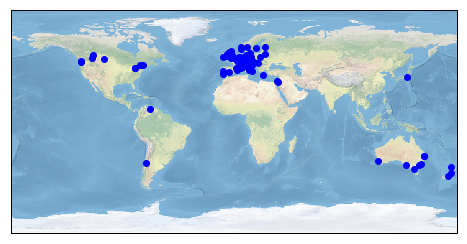

In [48]:
plot_cities(df['Longitude'], df['Latitude'])